In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = 'Electricity BILL.csv' 
df = pd.read_csv(file_path)

print(df.head())

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


   Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480  

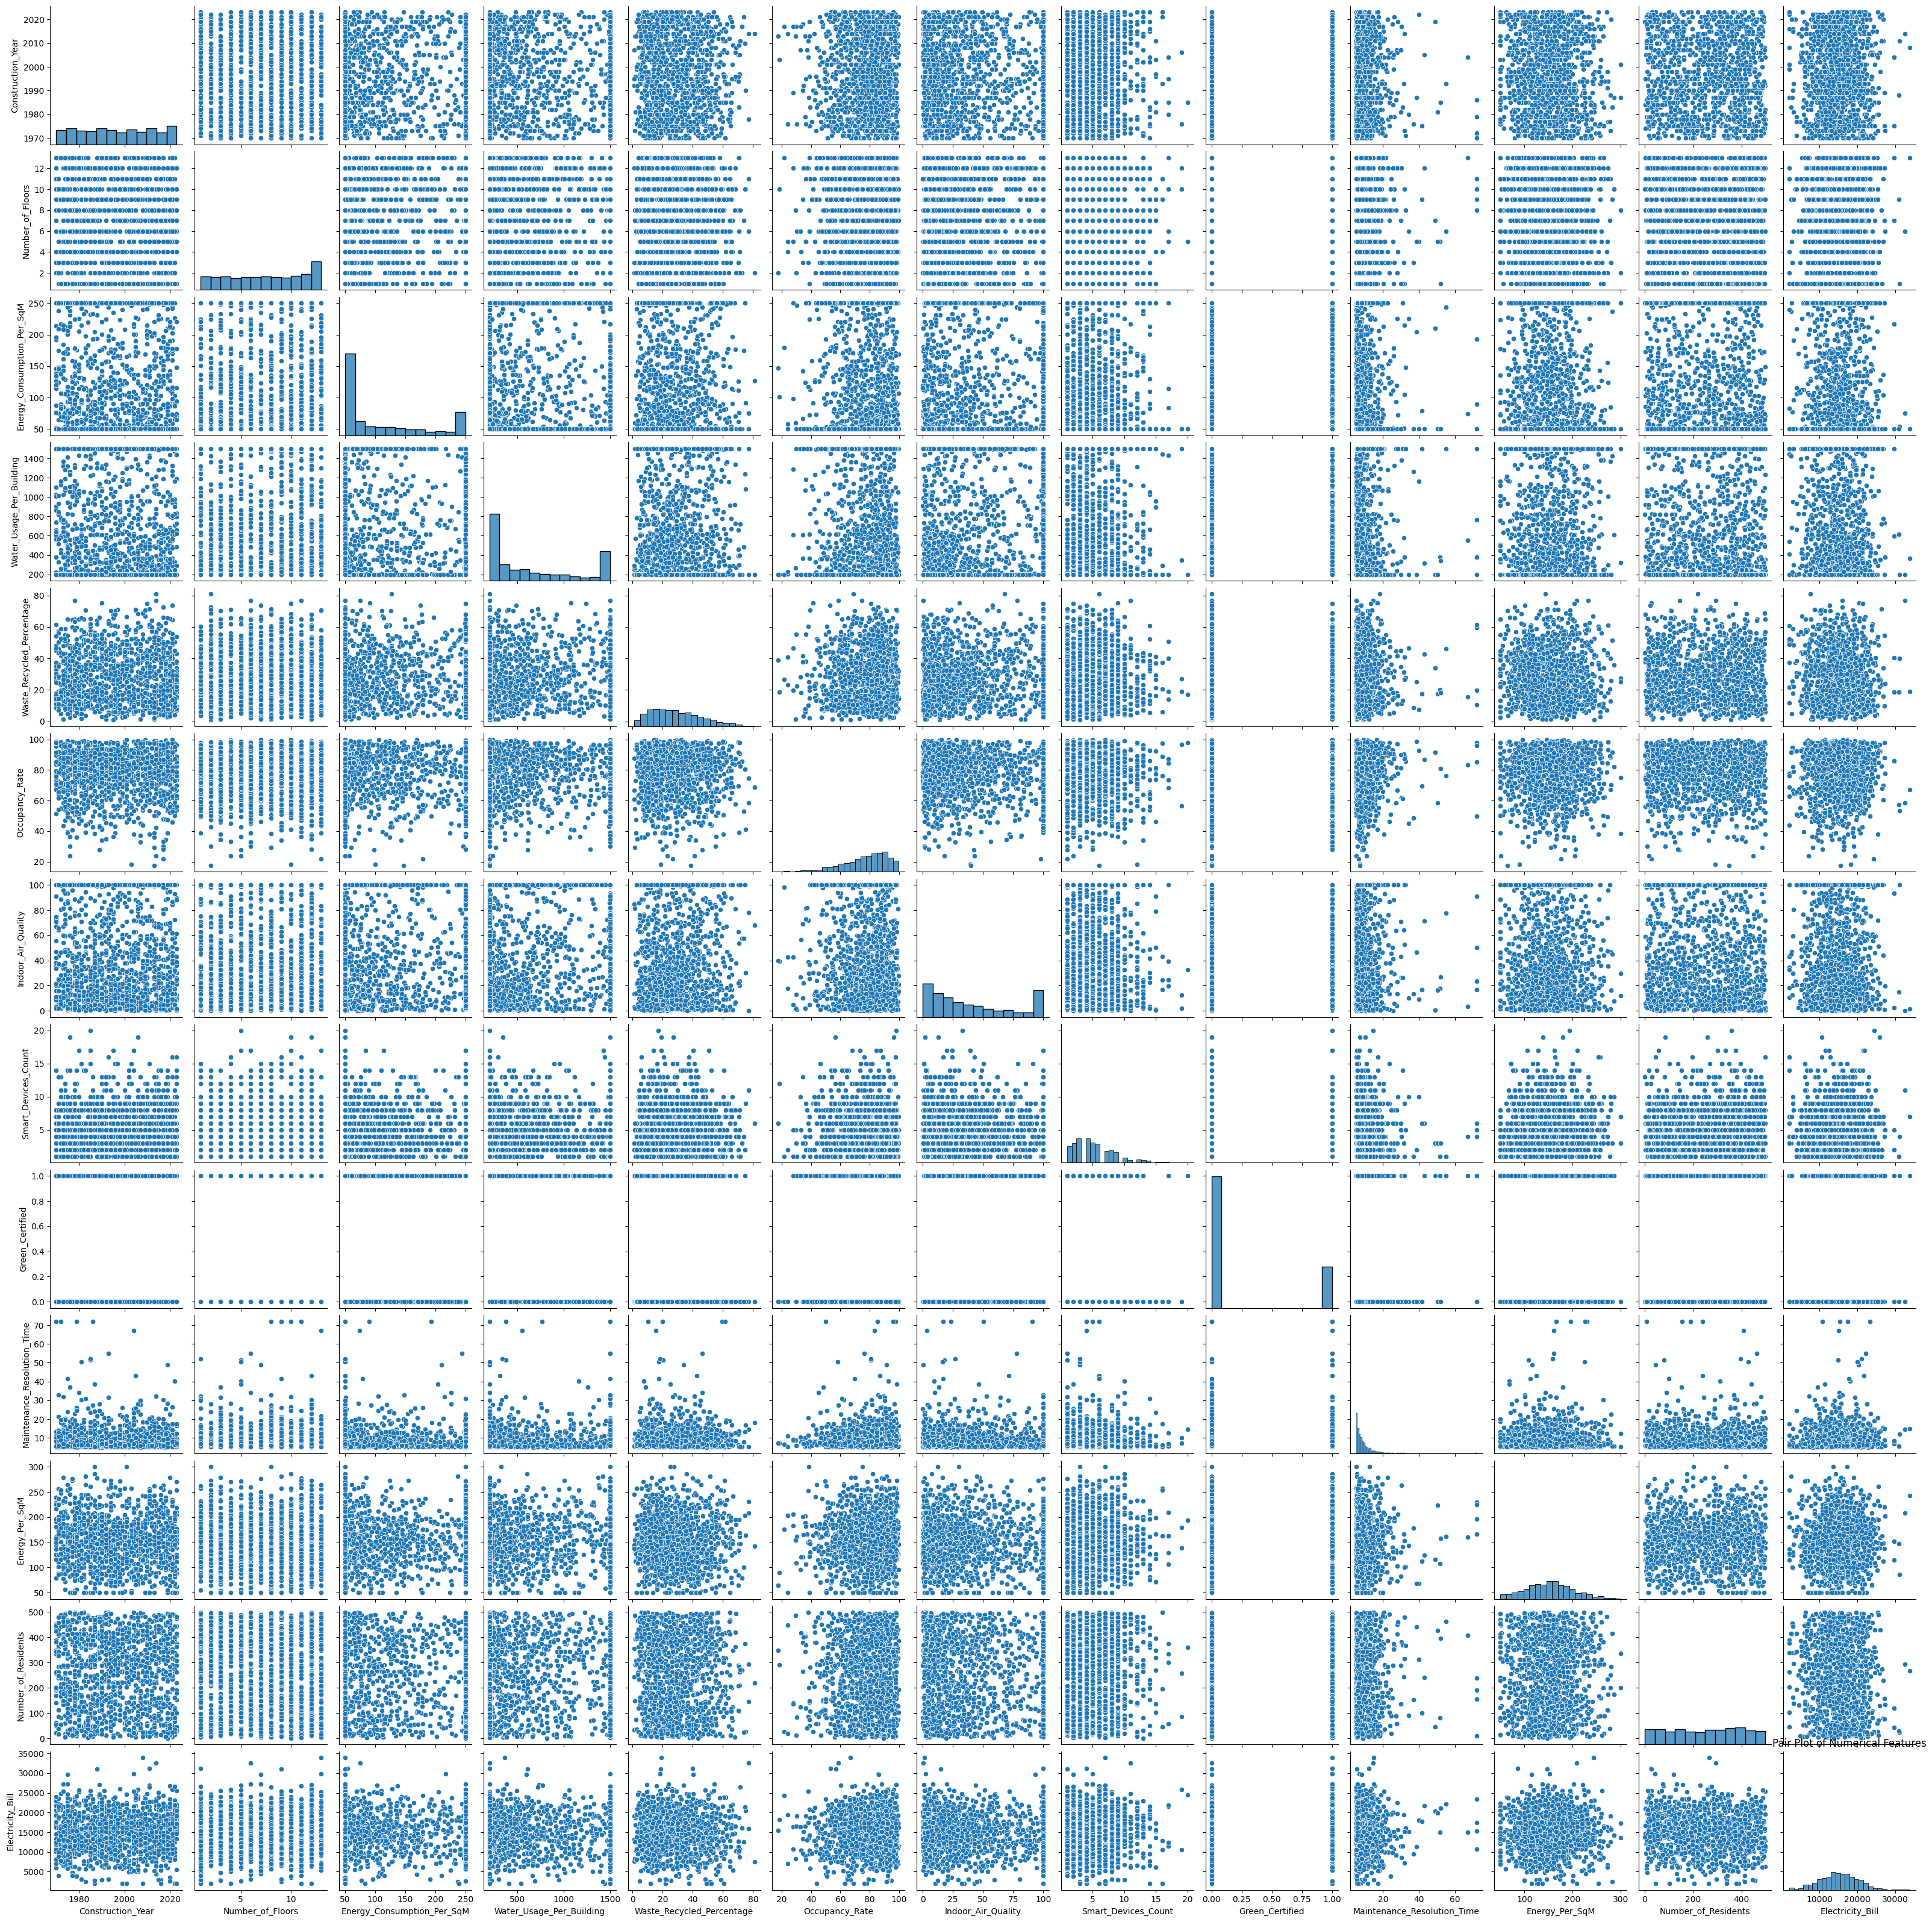

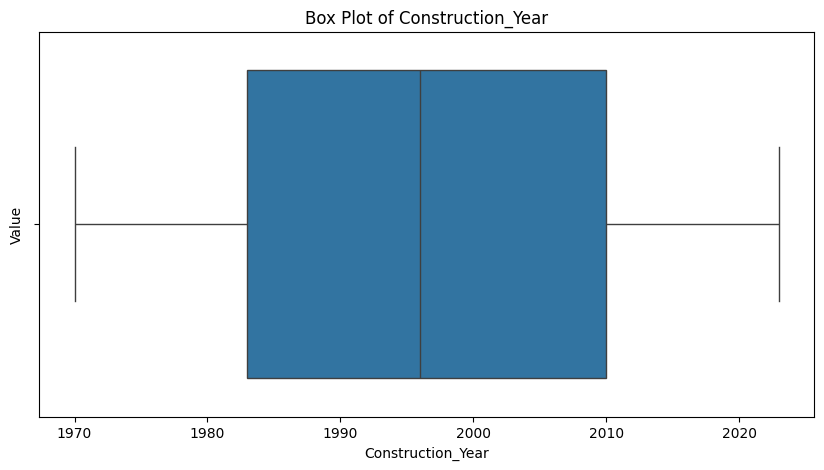

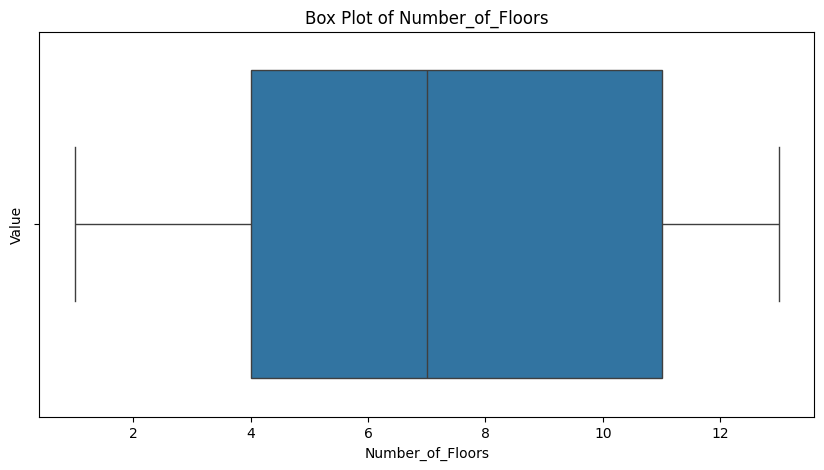

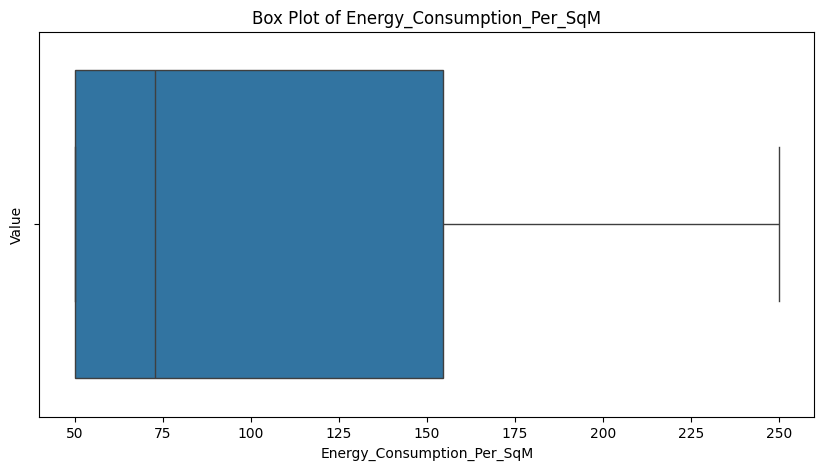

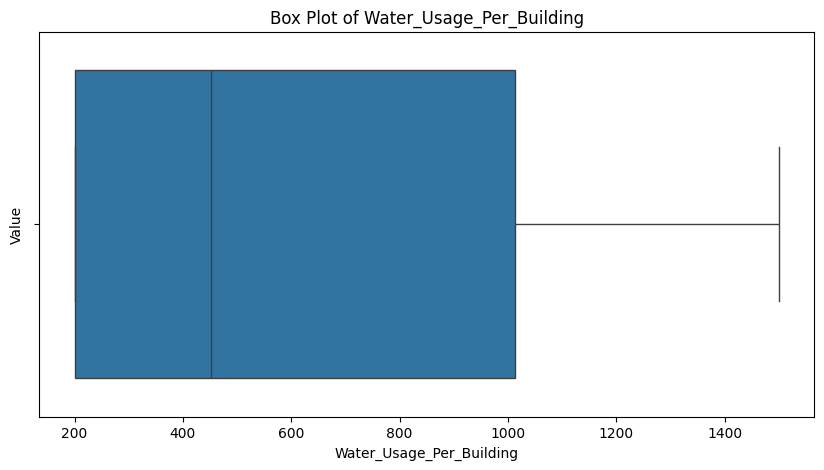

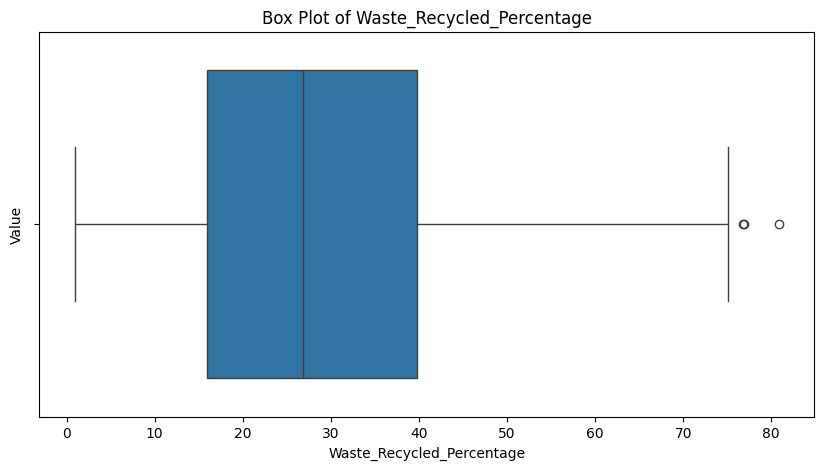

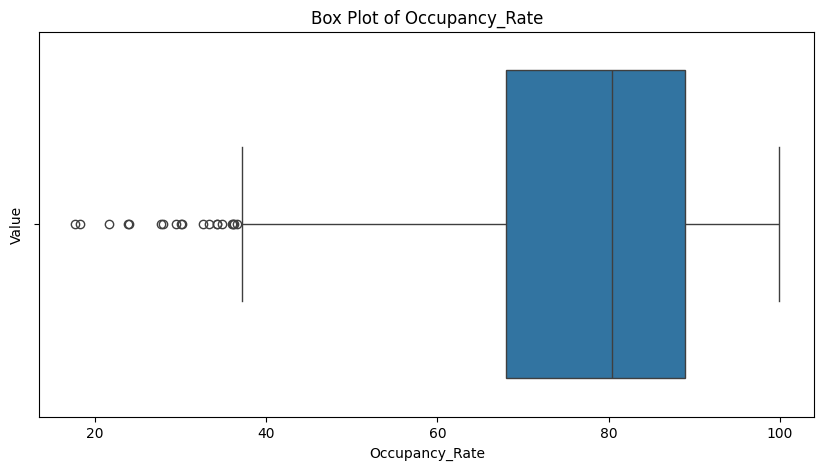

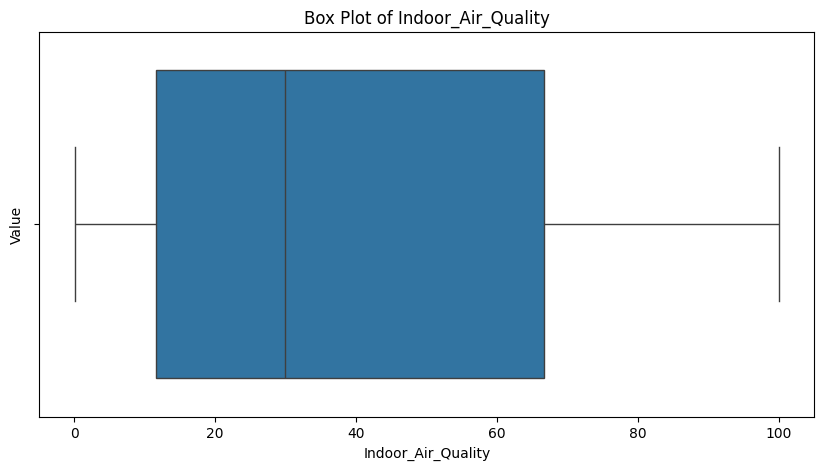

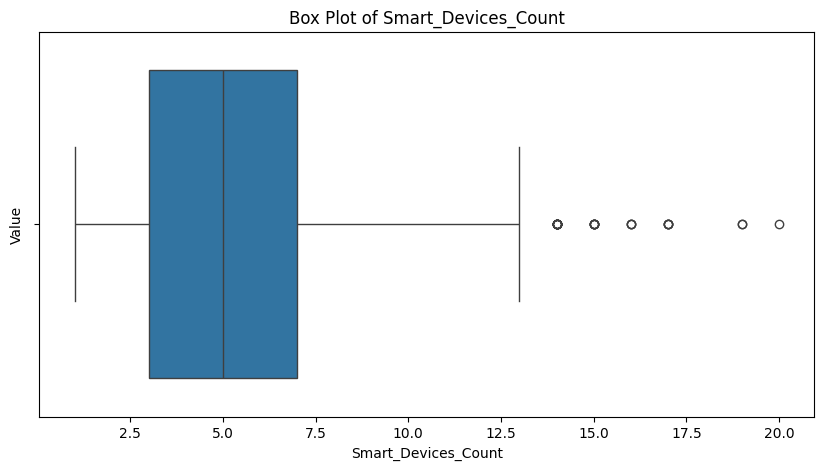

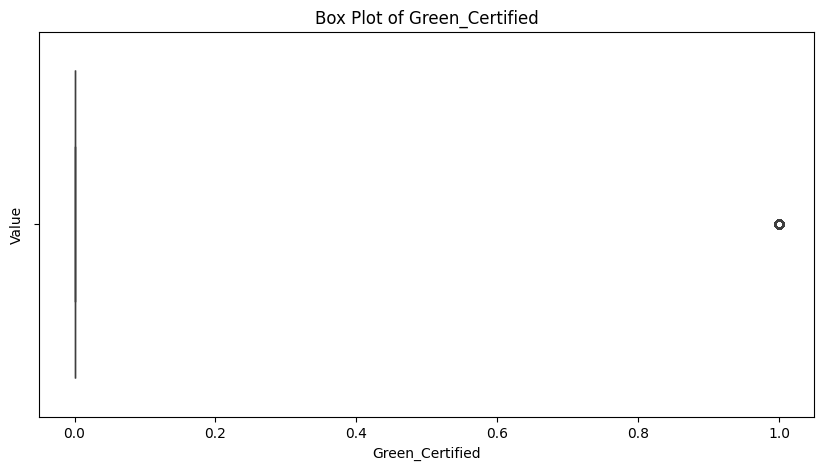

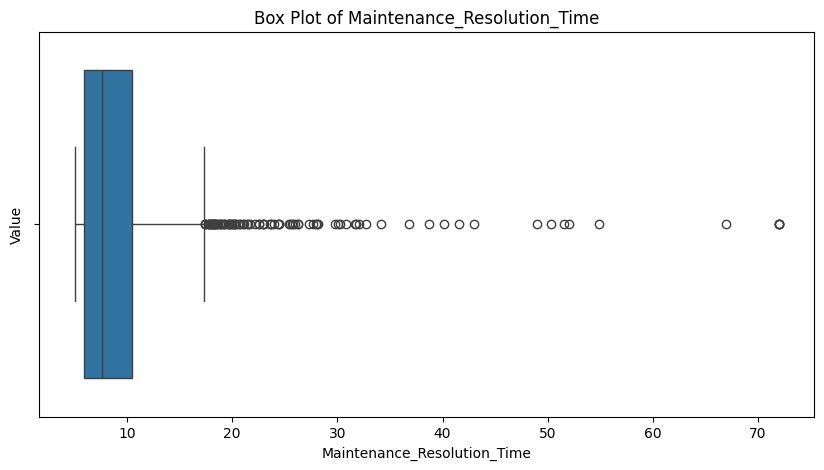

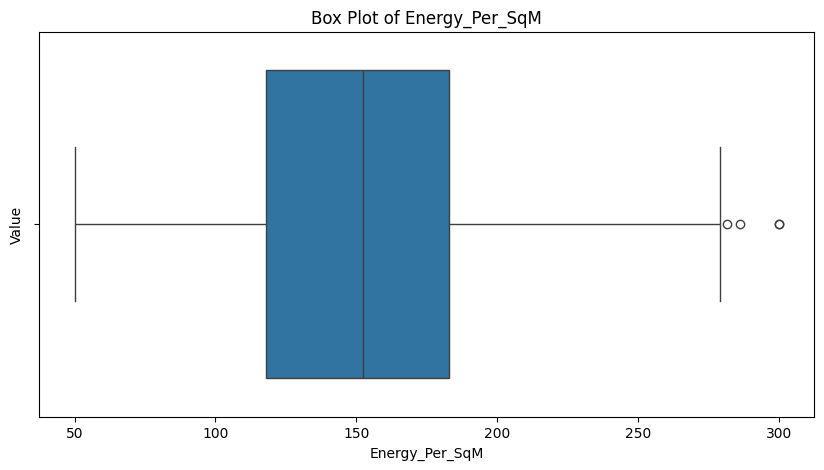

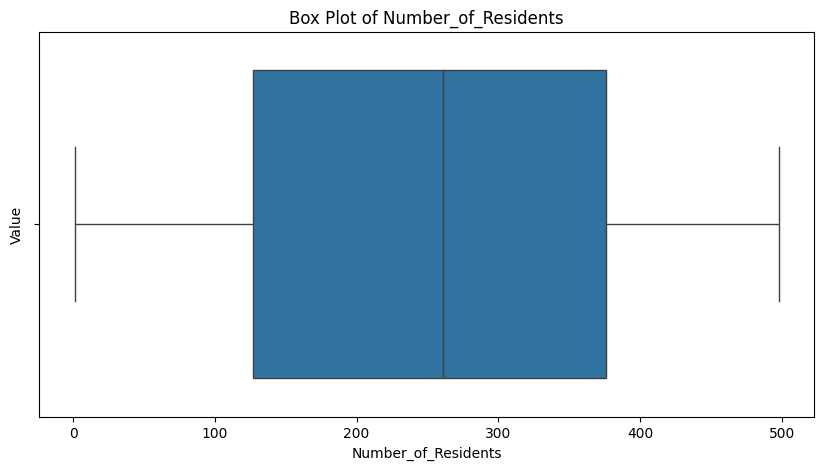

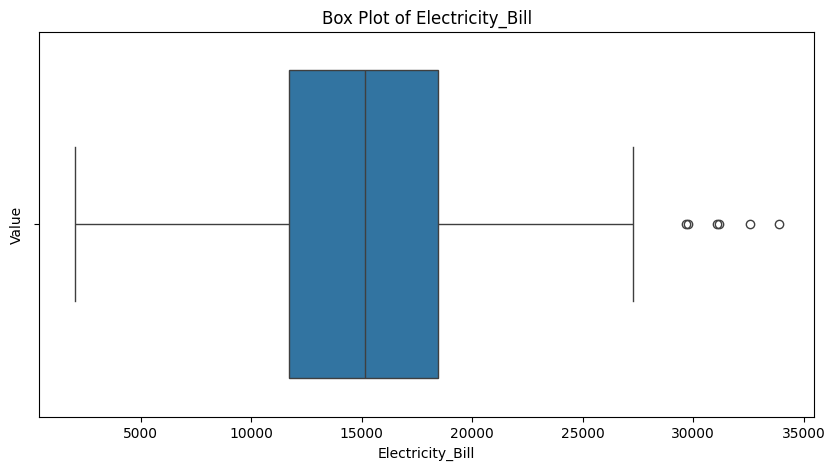

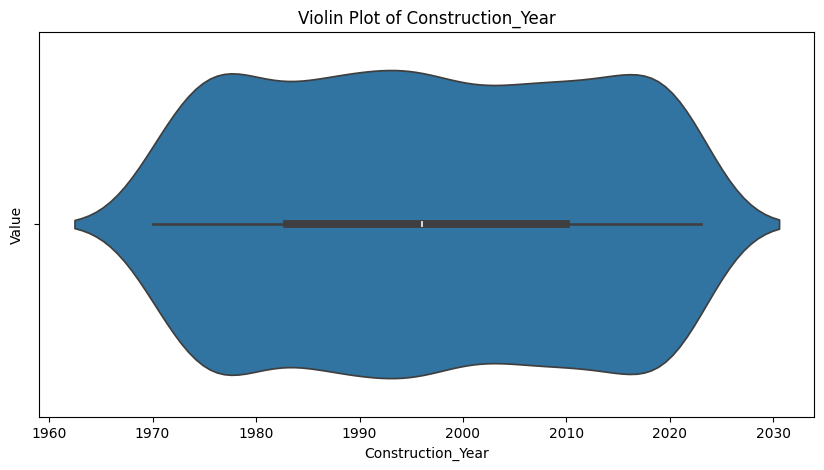

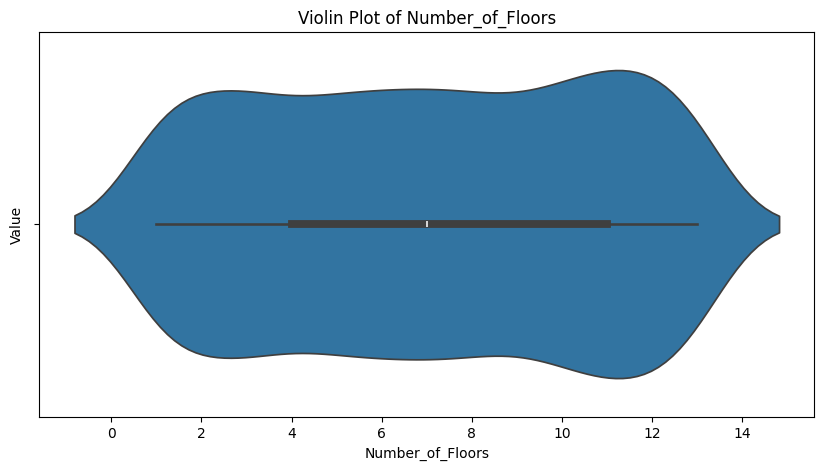

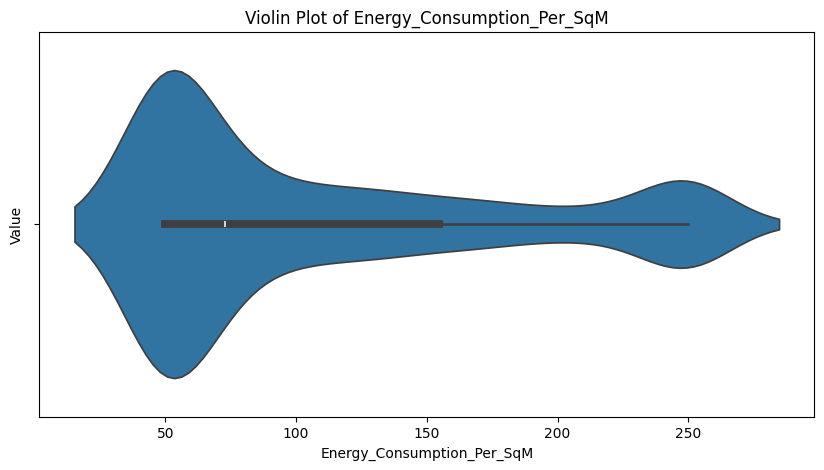

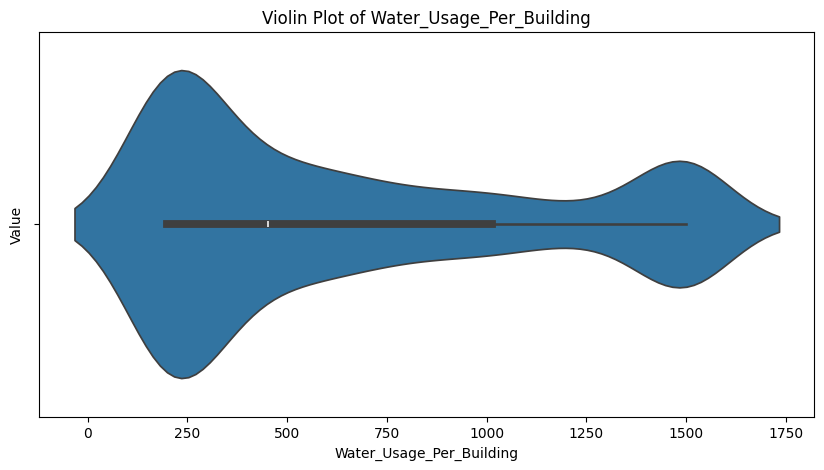

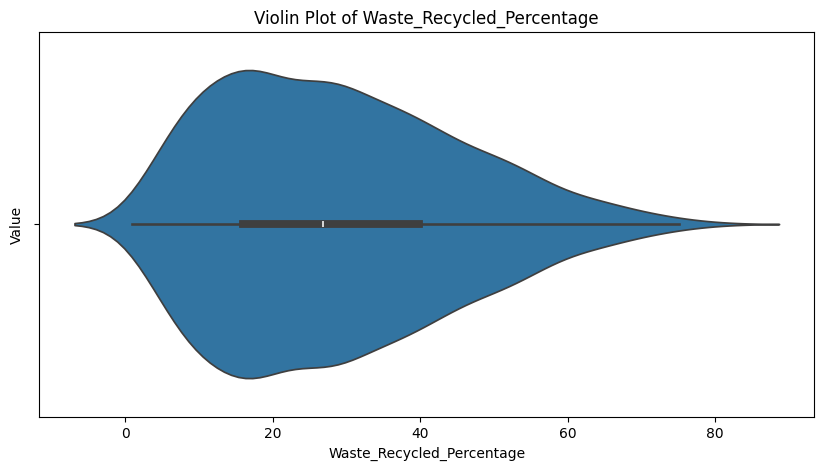

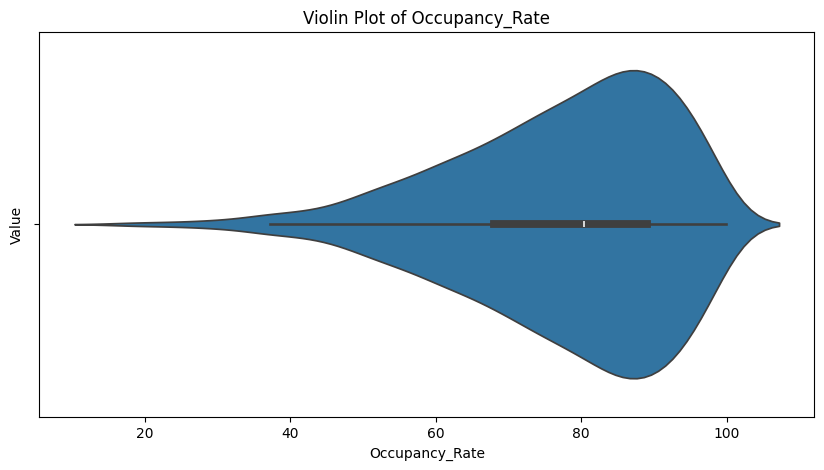

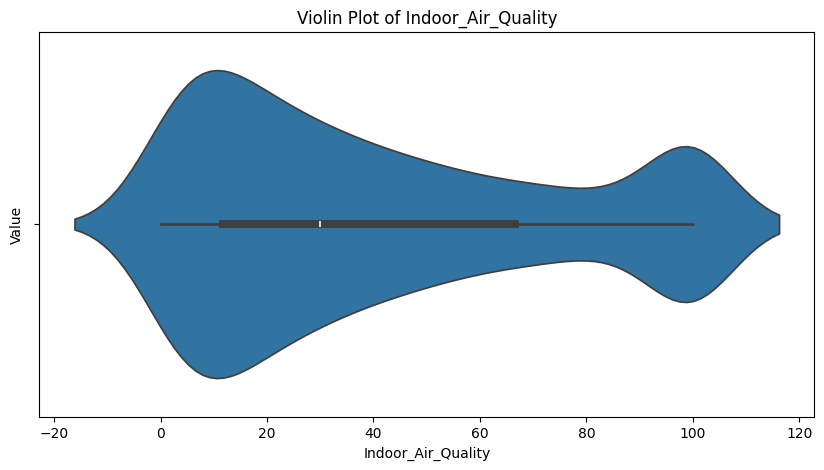

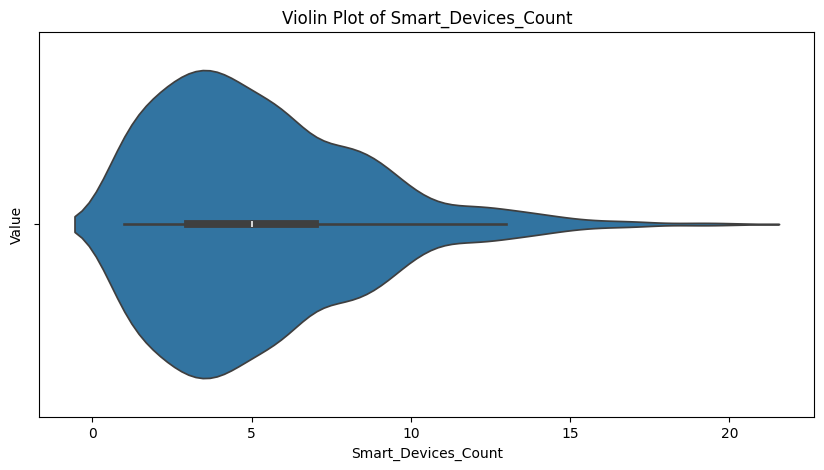

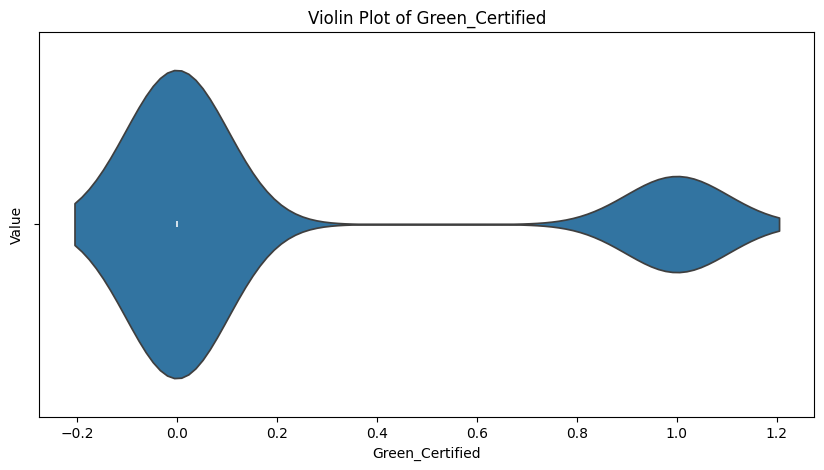

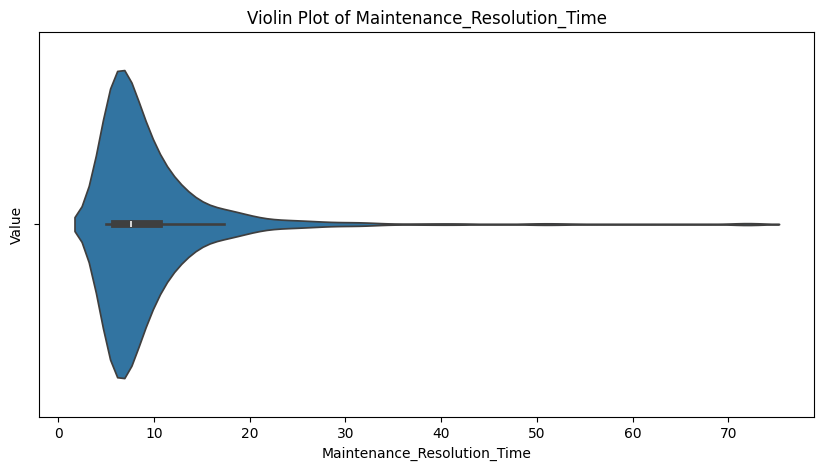

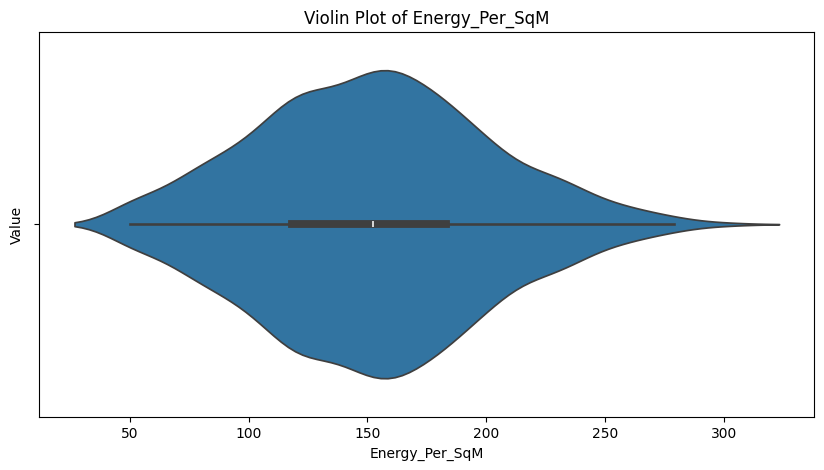

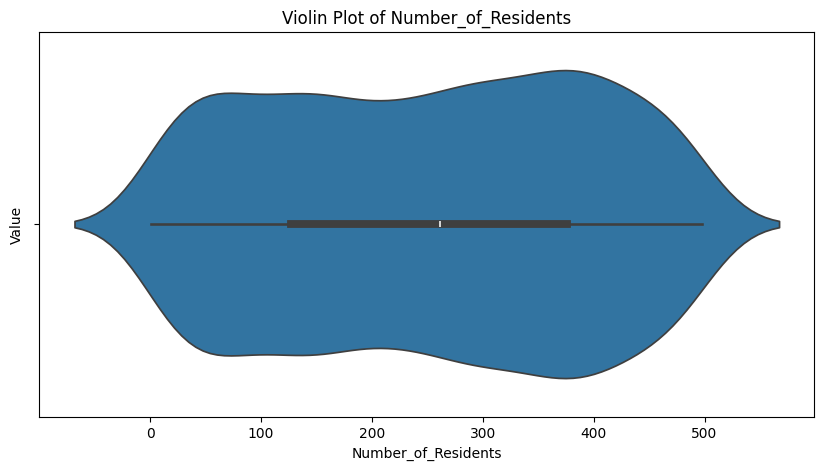

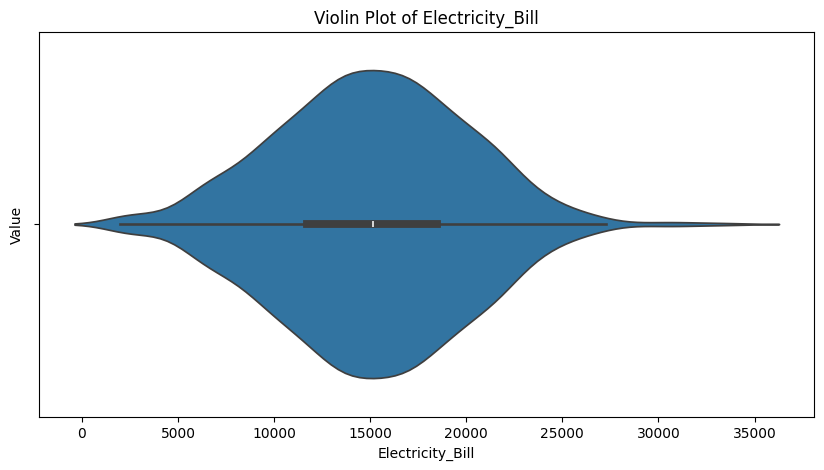

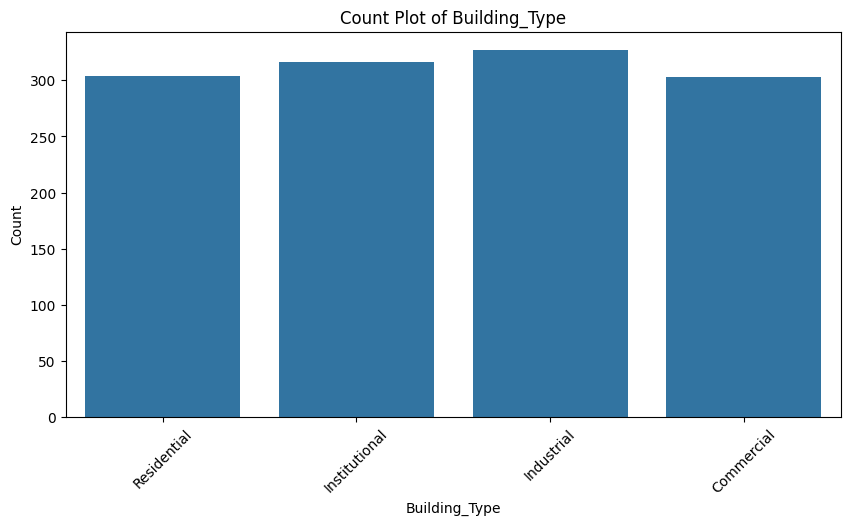

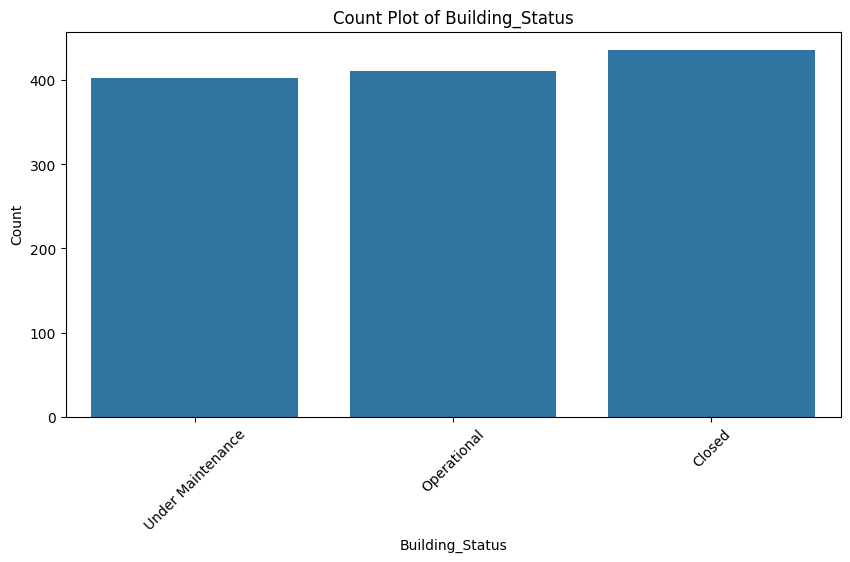

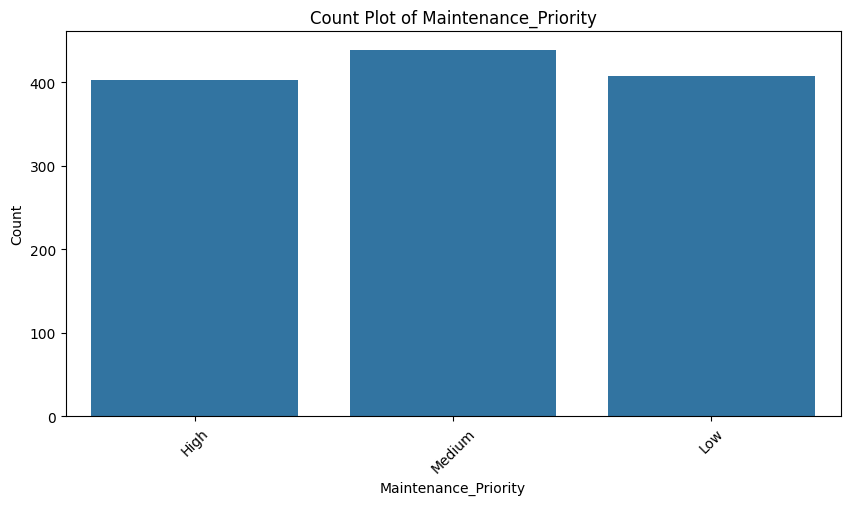

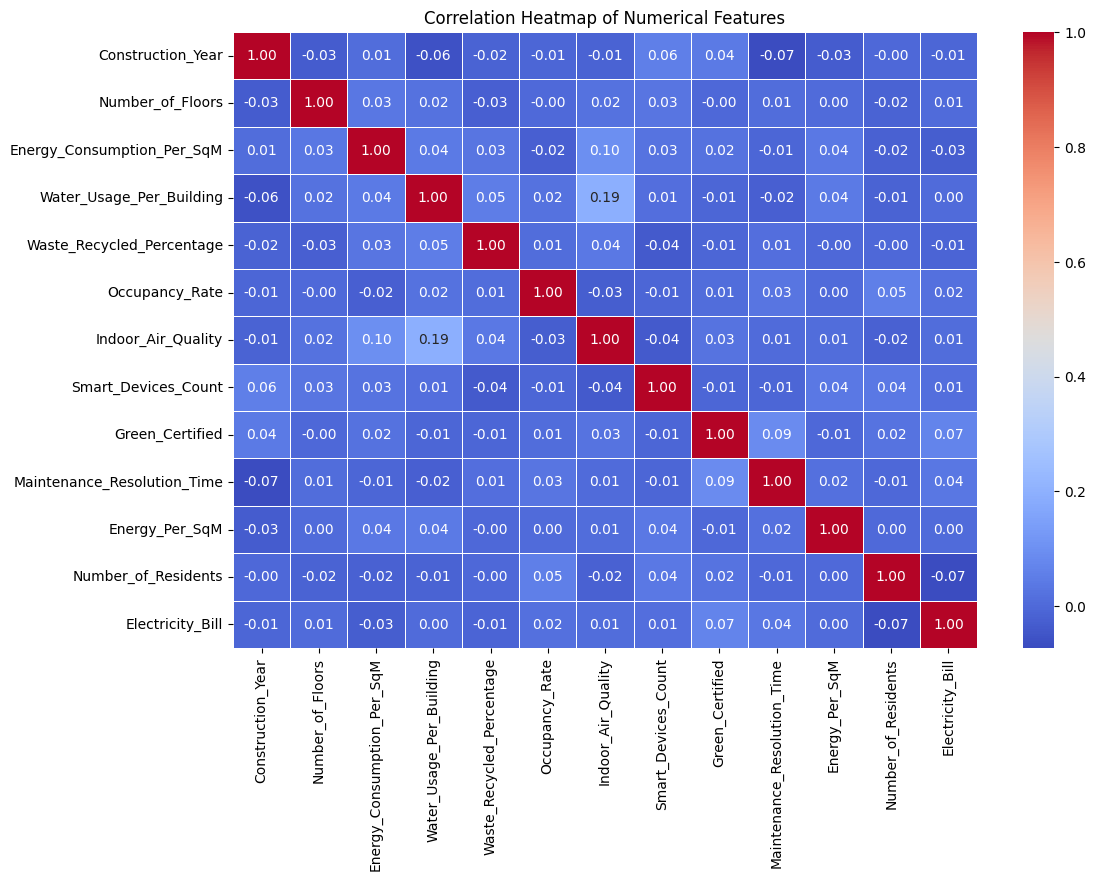

In [2]:
# EDA: Pair Plot 
sns.pairplot(df.select_dtypes(include=np.number))
plt.title('Pair Plot of Numerical Features')
plt.show()

# Box Plots 

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Value')
    plt.show()

# Violin Plots
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=df, x=col)
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Value')
    plt.show()

# Count Plot for categorical features 
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap for numerical features
# Filter only numerical columns for the correlation matrix
plt.figure(figsize=(12, 8))
numerical_data = df.select_dtypes(include=np.number)  # Only select numeric columns for correlation
corr_matrix = numerical_data.corr()  # Compute correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


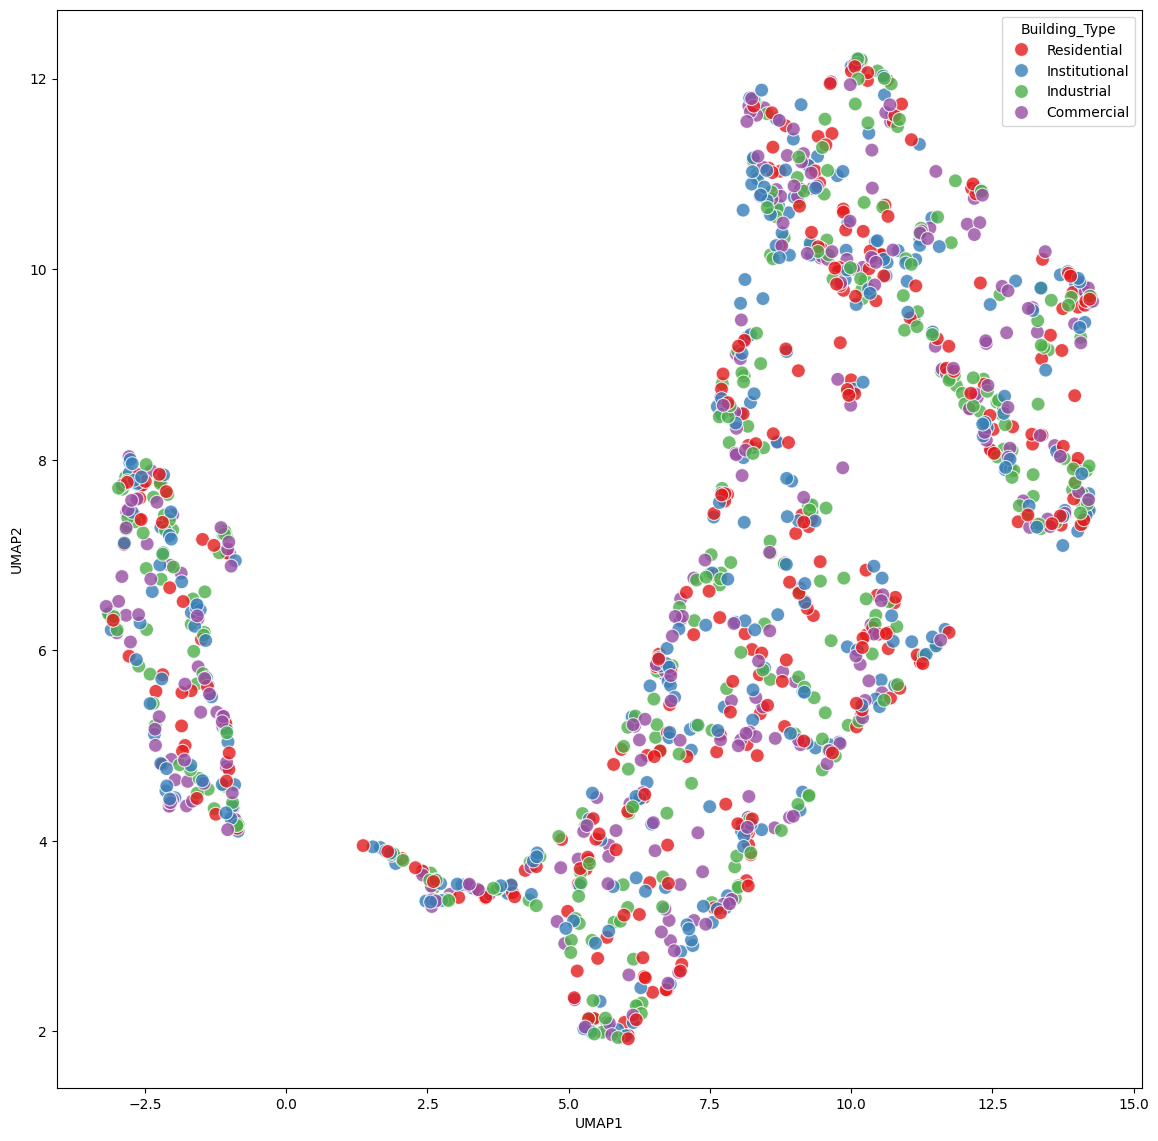

In [3]:
import umap

columns_to_scale = [col for col in numerical_cols if col != 'Electricity_Bill']

# umap
reducer = umap.UMAP(n_components=2, random_state = 42)
embedding = reducer.fit_transform(df[columns_to_scale])
df_umap = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# categorising
if len(categorical_cols) > 0:
    color_by = categorical_cols[0]  
    df_umap[color_by] = df[color_by]

# plot
plt.figure(figsize=(14, 14))
if len(categorical_cols) > 0:
    sns.scatterplot(x='UMAP1', y='UMAP2', hue=color_by, data=df_umap, palette='Set1', s=100, alpha=0.8)
else:
    sns.scatterplot(x='UMAP1', y='UMAP2', data=df_umap, s=100, alpha=0.8)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Handle missing values: Replace missing values in numerical columns only
df[numerical_cols].fillna(df[numerical_cols].mean(), inplace=True)

# Normalize numerical features except 'Electricity_Bill'
scaler = StandardScaler()
numerical_cols_without_target = [col for col in numerical_cols if col != 'Electricity_Bill']
df[numerical_cols_without_target] = scaler.fit_transform(df[numerical_cols_without_target])

# Label Encode categorical features
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Prepare feature matrix X and target variable y
X = df.drop('Electricity_Bill', axis=1)  
y = df['Electricity_Bill']

C:\Users\Rishi\AppData\Local\Temp\ipykernel_43548\1599557474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols].fillna(df[numerical_cols].mean(), inplace=True)


In [7]:
# split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
def evaluate_model(y_true, y_pred, X_set):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_set.shape[1] - 1)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, r2, adjusted_r2, mae

def print_metrics(train_mse,train_rmse,train_r2,train_adj_r2, train_mae, test_mse,test_rmse,test_r2,test_adj_r2, test_mae):
    print("Training set evaluation:")
    print(f"MSE: {train_mse:.4f}")
    print(f"RMSE: {train_rmse:.4f}")
    print(f"R2 Score: {train_r2:.4f}")
    print(f"Adjusted R2 Score: {train_adj_r2:.4f}")
    print(f"MAE: {train_mae:.4f}")

    print("\nTest set evaluation:")
    print(f"MSE: {test_mse:.4f}")
    print(f"RMSE: {test_rmse:.4f}")
    print(f"R2 Score: {test_r2:.4f}")
    print(f"Adjusted R2 Score: {test_adj_r2:.4f}")
    print(f"MAE: {test_mae:.4f}")

In [9]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# evaluate metrics
train_mse, train_rmse, train_r2, train_adj_r2, train_mae = evaluate_model(y_train, y_train_pred, X_train)
test_mse,test_rmse,test_r2,test_adj_r2, test_mae = evaluate_model(y_test, y_test_pred, X_test)

# print metrics
print_metrics(train_mse,train_rmse,train_r2,train_adj_r2, train_mae, test_mse,test_rmse,test_r2,test_adj_r2, test_mae)

Training set evaluation:
MSE: 24475013.1685
RMSE: 4947.2228
R2 Score: 0.0139
Adjusted R2 Score: -0.0011
MAE: 4006.3285

Test set evaluation:
MSE: 24278016.1557
RMSE: 4927.2727
R2 Score: 0.0000
Adjusted R2 Score: -0.0641
MAE: 3842.4093


In [10]:
from sklearn.feature_selection import RFE
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

In [11]:
# set RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X, y)

# selcted features are 
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

# new feature set, split data
X_selected = X[selected_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y,test_size=0.2, random_state=42)

# train w sel features
lin_reg_sel = LinearRegression()
lin_reg_sel.fit(X_train_sel, y_train_sel)

# predecticions
y_train_pred_sel = lin_reg_sel.predict(X_train_sel)
y_test_pred_sel = lin_reg_sel.predict(X_test_sel)

# evaluate metrics
train_mse_sel, train_rmse_sel, train_r2_sel, train_adj_r2_sel, train_mae_sel  = evaluate_model(y_train_sel,y_train_pred_sel, X_train_sel)
test_mse_sel, test_rmse_sel, test_r2_sel, test_adj_r2, test_mae_sel = evaluate_model(y_test_sel, y_test_pred_sel, X_test_sel)

print_metrics(train_mse_sel, train_rmse_sel, train_r2_sel, train_adj_r2_sel, train_mae_sel, test_mse_sel, test_rmse_sel, test_r2_sel, test_adj_r2, test_mae_sel)

Selected features: ['Building_Type', 'Green_Certified', 'Number_of_Residents']
Training set evaluation:
MSE: 24569032.9069
RMSE: 4956.7159
R2 Score: 0.0101
Adjusted R2 Score: 0.0072
MAE: 4006.4734

Test set evaluation:
MSE: 23941409.0630
RMSE: 4892.9959
R2 Score: 0.0139
Adjusted R2 Score: 0.0019
MAE: 3813.9481


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

# drop first avoids multicollinearity
# sparse=True for large datasets, sparse=False for moderate datasets, especially if we use ML models on the data later
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_cols])

X_encoded = np.hstack([encoded_categorical, df[numerical_cols_without_target]])

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y,test_size=0.2, random_state=42)

# ridge 
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_enc, y_train_enc)

y_train_pred_enc = ridge_reg.predict(X_train_enc)
y_test_pred_enc = ridge_reg.predict(X_test_enc)

train_mse_enc, train_rmse_enc, train_r2_enc, train_adj_r2_enc, train_mae_enc = evaluate_model(y_train_enc, y_train_pred_enc, X_train_enc)
test_mse_enc, test_rmse_enc, test_r2_enc, test_adj_r2_enc, test_mae_enc = evaluate_model(y_test_enc, y_test_pred_enc, X_test_enc)

print_metrics(train_mse_enc, train_rmse_enc, train_r2_enc, train_adj_r2_enc, train_mae_enc, test_mse_enc, test_rmse_enc, test_r2_enc, test_adj_r2_enc, test_mae_enc)

Training set evaluation:
MSE: 24188934.3401
RMSE: 4918.2247
R2 Score: 0.0254
Adjusted R2 Score: 0.0066
MAE: 3976.7356

Test set evaluation:
MSE: 24128288.5043
RMSE: 4912.0554
R2 Score: 0.0062
Adjusted R2 Score: -0.0759
MAE: 3797.5126


In [13]:
from sklearn.decomposition import FastICA

transformer = FastICA(4)
X_ica = transformer.fit_transform(X_encoded)

X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica,y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_ica,y_train_ica)

y_train_pred_ica = model.predict(X_train_ica)
y_test_pred_ica = model.predict(X_test_ica)

train_mse_ica, train_rmse_ica, train_r2_ica, train_r2_adj_ica, train_mae_ica = evaluate_model(y_train_ica, y_train_pred_ica, X_train_ica)
test_mse_ica, test_rmse_ica, test_r2_ica, test_r2_adj_ica, test_mae_ica = evaluate_model(y_test_ica, y_test_pred_ica, X_test_ica)

print_metrics(train_mse_ica, train_rmse_ica, train_r2_ica, train_r2_adj_ica, train_mae_ica, test_mse_ica, test_rmse_ica, test_r2_ica, test_r2_adj_ica, test_mae_ica)


Training set evaluation:
MSE: 24718005.3039
RMSE: 4971.7206
R2 Score: 0.0041
Adjusted R2 Score: 0.0001
MAE: 4016.7368

Test set evaluation:
MSE: 24450425.9303
RMSE: 4944.7372
R2 Score: -0.0071
Adjusted R2 Score: -0.0235
MAE: 3857.9908


In [14]:
from sklearn.linear_model import ElasticNet

alphas = [0.1, 0.5, 1.0, 2.0]
for alpha in alphas:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)
    elasticnet.fit(X_train, y_train)
    
    # predict
    y_train_pred_elastic = elasticnet.predict(X_train)
    y_test_pred_elastic = elasticnet.predict(X_test)
    
    # evaluate
    train_mse_elastic, train_rmse_elastic, train_r2_elastic, train_adj_r2_elastic, train_mae_elastic = evaluate_model(y_train, y_train_pred_elastic, X_train)
    test_mse_elastic, test_rmse_elastic, test_r2_elastic, test_adj_r2_elastic, test_mae_elastic = evaluate_model(y_test, y_test_pred, X_test)
    
    # print
    print(f"For alpha = {alpha}")
    print_metrics(train_mse_elastic, train_rmse_elastic, train_r2_elastic, train_adj_r2_elastic, train_mae_elastic, test_mse_elastic, test_rmse_elastic, test_r2_elastic, test_adj_r2_elastic, test_mae_elastic)
    print("\n-------------------------------------------------------------------------------\n")

For alpha = 0.1
Training set evaluation:
MSE: 24475793.2838
RMSE: 4947.3016
R2 Score: 0.0139
Adjusted R2 Score: -0.0011
MAE: 4005.3930

Test set evaluation:
MSE: 24278016.1557
RMSE: 4927.2727
R2 Score: 0.0000
Adjusted R2 Score: -0.0641
MAE: 3842.4093

-------------------------------------------------------------------------------

For alpha = 0.5
Training set evaluation:
MSE: 24488680.1599
RMSE: 4948.6039
R2 Score: 0.0134
Adjusted R2 Score: -0.0017
MAE: 4003.0306

Test set evaluation:
MSE: 24278016.1557
RMSE: 4927.2727
R2 Score: 0.0000
Adjusted R2 Score: -0.0641
MAE: 3842.4093

-------------------------------------------------------------------------------

For alpha = 1.0
Training set evaluation:
MSE: 24512862.9956
RMSE: 4951.0467
R2 Score: 0.0124
Adjusted R2 Score: -0.0027
MAE: 4001.7690

Test set evaluation:
MSE: 24278016.1557
RMSE: 4927.2727
R2 Score: 0.0000
Adjusted R2 Score: -0.0641
MAE: 3842.4093

-------------------------------------------------------------------------------

F

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# preditc
y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

# evaluate
train_mse_gbr, train_rmse_gbr, train_r2_gbr, train_adj_r2_gbr, train_mae_gbr = evaluate_model(y_train, y_train_pred_gbr, X_train)
test_mse_gbr, test_rmse_gbr, test_r2_gbr, test_adj_r2_gbr, test_mae_gbr = evaluate_model(y_test, y_test_pred_gbr, X_test)

# print
print("Gradient Boosting Regressor:\n")
print_metrics(train_mse_gbr, train_rmse_gbr, train_r2_gbr, train_adj_r2_gbr, train_mae_gbr, test_mse_gbr, test_rmse_gbr, test_r2_gbr, test_adj_r2_gbr, test_mae_gbr)

Gradient Boosting Regressor:

Training set evaluation:
MSE: 14926446.2573
RMSE: 3863.4759
R2 Score: 0.3986
Adjusted R2 Score: 0.3895
MAE: 3092.7482

Test set evaluation:
MSE: 24392500.9011
RMSE: 4938.8765
R2 Score: -0.0047
Adjusted R2 Score: -0.0691
MAE: 3815.7032
